# Week 1: Handling missing values (Video part 13)

Objective:
- How to use missing values effectively?
- How to engineer new features from them?

### Missing data, numeric
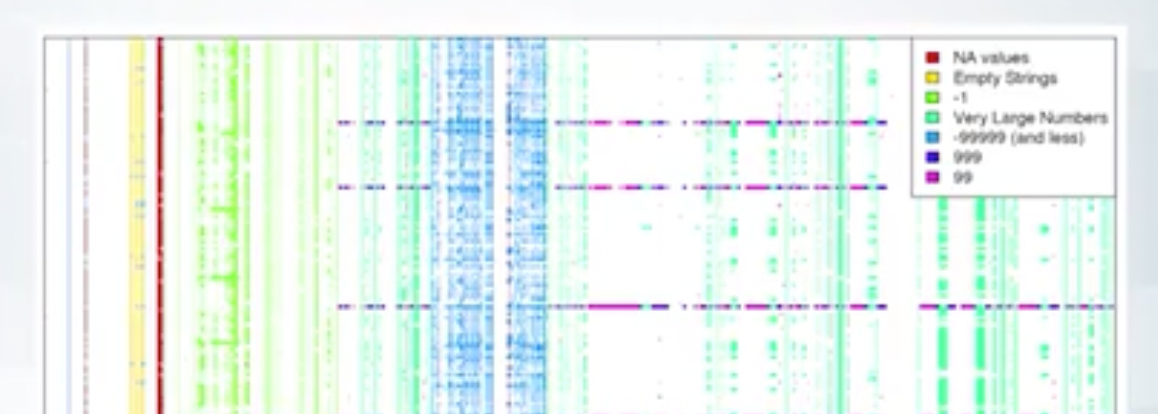
- Above is graph of missing values from Springfield competition.
- How can we know if a certain number (eg -1) is a missing value?
  - We could plot a histogram. Eg if a feature has a uniform distribution between 0 and 1; and we have a small peak of -1 value. Since this feature does not has nan values, then we can safely assumed that -1 is missing values.
  - Our histogram could also look like the right plot below. Here the missing values are most likely be filled by the feature's mean value.
- The examples above can be generalized and apply to other cases. So, here we learn that missing values can be "hidden" from us (hidden ie filled as some other values eg mean, median etc - instead of nan)
 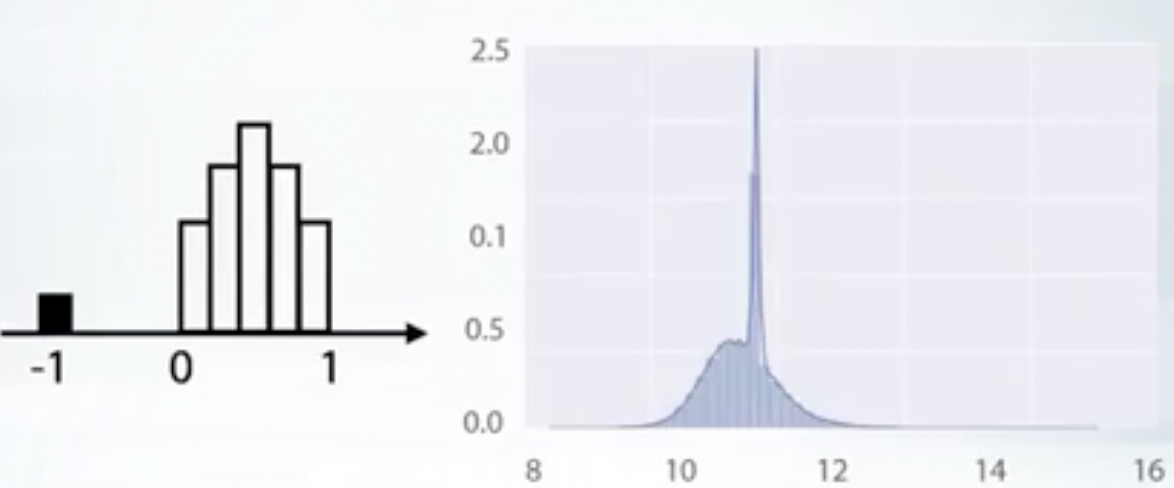

### Fillna approaches
- Most common approaches:
  - replacing missing vlaues with some values (eg -999, -1 etc)
  - mean, median
  - reconstruct value
1. Replacing missing values with some values (-999, -1 etc)
   - Pro: gives tree-based model the possibility to take missing value into separate category.
   - Cons: performance of linear network can suffer.
2. Replacing with mean, median
   - Pro: beneficial for simple linear models and neural networks.
   - Cons: hard for tree-based methods to select object which had missing values in the first place.
   - Workaround:
     - Create a new column to indicate if value is missing from feature (eg `isnull` in below example). This can solve the problem for tree-models while still computing means and median for linear & neural network models. Downside of this is we might increase number of columns.
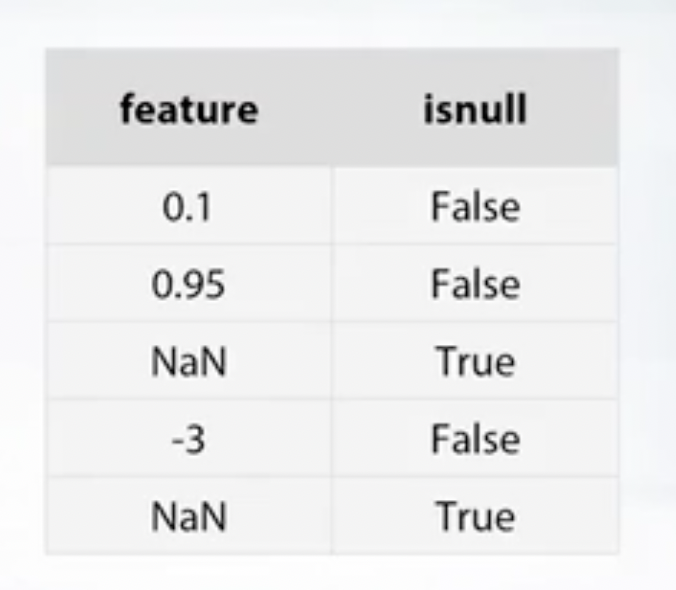
3. Replacing missing values by reconstructing them (interpolation)
   - Should not replace missing values before feature generation, because it could be misleading
   - Example 1: say we want to encode `categorical_feature` using mean. What happend if we fill the nan as -999? We can see that the mean for `categorical_feature=B` becomes unreliable.
     - The most reliable way to handle this is to simply ignore missing values while calculating means for each category.
  
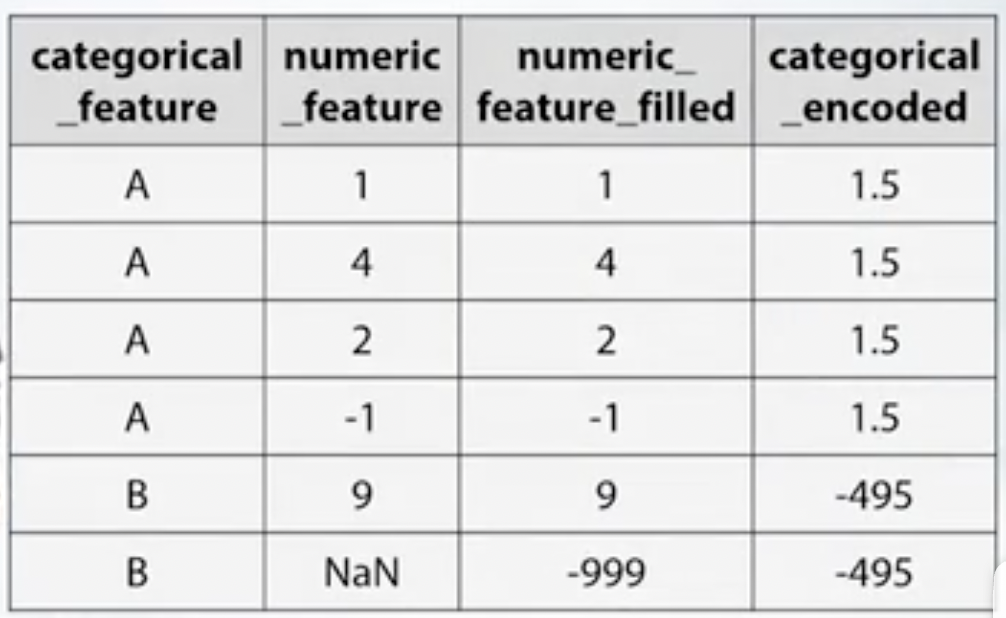


### Other approaches
- We can treat outliers as missing values
- In case when we have some categories that appear in the test set but not in train set, it can be beneficial to change/encode that feature (eg using frequency_encdoing etc). This is because upon seeing category that it has never seen before, the model might just treat it randomly. Eg in the example below, we are using frequency_encoding
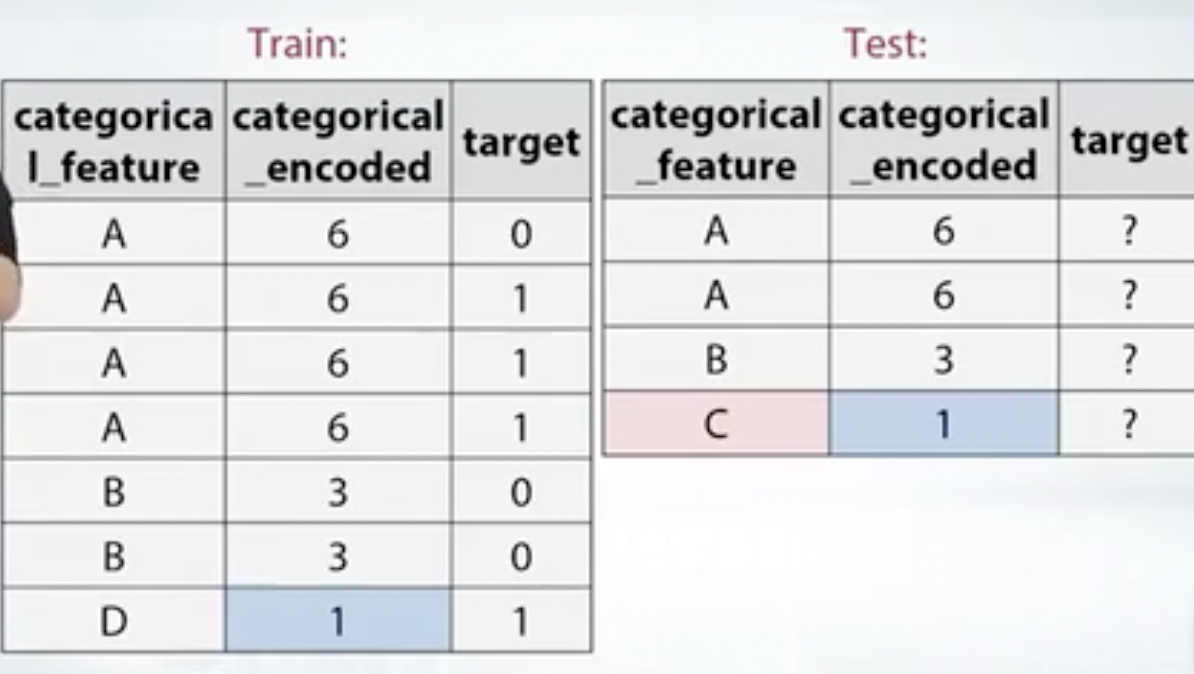

# Conclusion
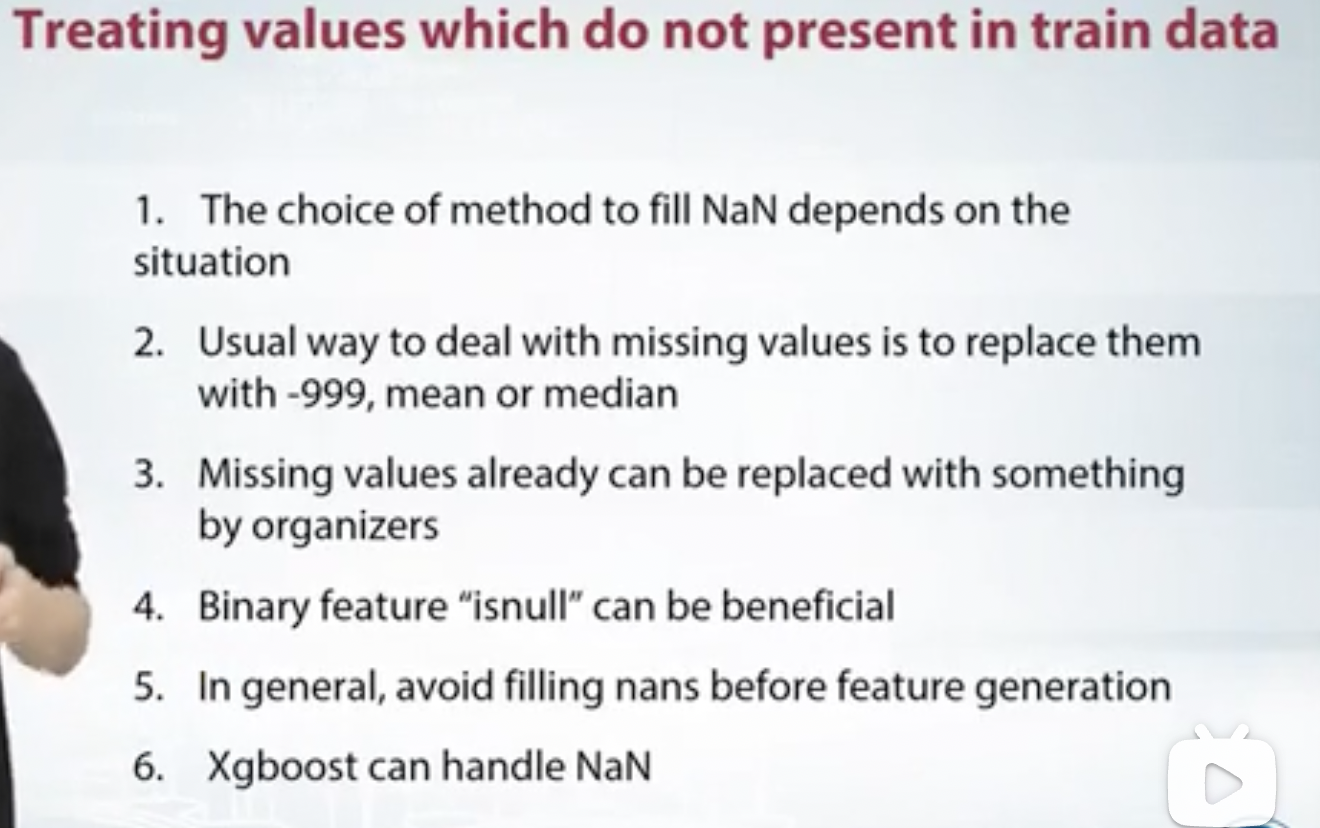

# What I learnt:
- We should always generate features before fillnas
- How to recognize missing values in histogram (eg fillna with mean will have peak near mean of the distribution etc)
- We can treat outliers as missing values
- We can encode missing values in test (feature values that appear in test set but not in train set) so the model will not just randomly predict
- Fillna(strategy=mean, median) can be useful for linear model, neural network but not so for trees. To mitigate this, just add another column `isnull` to indicate whether the value for that specific row is missing. This will help tree-models make better split (help them to maybe group missing values together in a group).